Exploratory Data Analysis - EDA

In this section, we'll systematically explore each dataset provided by Elo. Our goal is to understand the structure, identify data types, pinpoint missing values, uncover distributions, and hypothesize relationships between features and the target variable. This foundational understanding is critical for effective feature engineering and model selection.

Initial Data Loading and Overview

We'll start by loading all the provided CSV files and the data dictionary. Then, we'll perform initial checks using head(), info(), and describe() to get a high-level understanding of each DataFrame.

In this exploratory data analysis (EDA) of the Elo Merchant Category Recommendation dataset, we began by examining the structure of the training data, including its columns, data types, and sample records. We analyzed the distribution of the target variable (customer loyalty score), identifying skewness, potential outliers, and its statistical properties. Correlation analysis revealed relationships between the target and numerical features, supported by both a correlation matrix and a heatmap. We further explored how the target variable changes with respect to feature_1, feature_2, and feature_3 using regression plots. Categorical relationships were visualized through bar plots showing the average target value across various feature categories, including activation month. We also tracked how the mean target value evolves over time and inspected individual feature distributions using histograms. Pairwise relationships between features were examined via a pairplot, and we explored interaction effects between features using a pivot heatmap. Finally, we calculated the skewness and kurtosis of the target variable to understand its distributional shape in greater detail. This comprehensive EDA provides critical insights for feature engineering and model development.

First 5 Rows:
  first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749  

 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 no

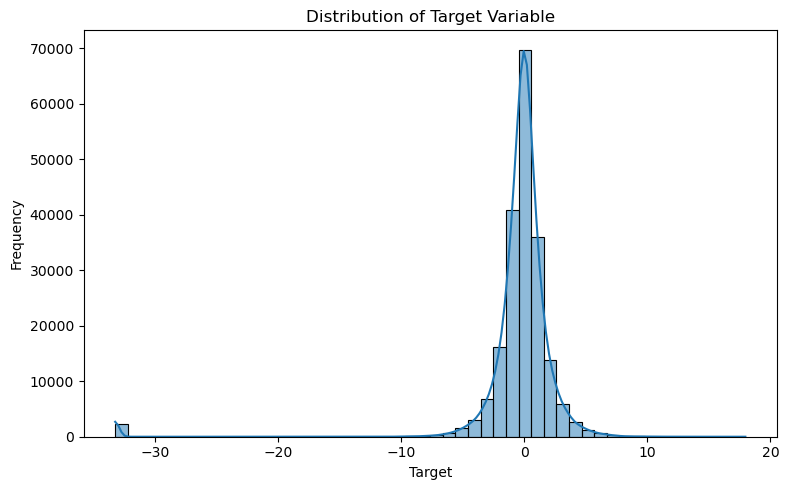


 No Missing Values in the Dataset.

 Target Summary Stats:
count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068

 Correlation with 'target':
target       1.000000
feature_2   -0.006242
feature_3   -0.008125
feature_1   -0.014251


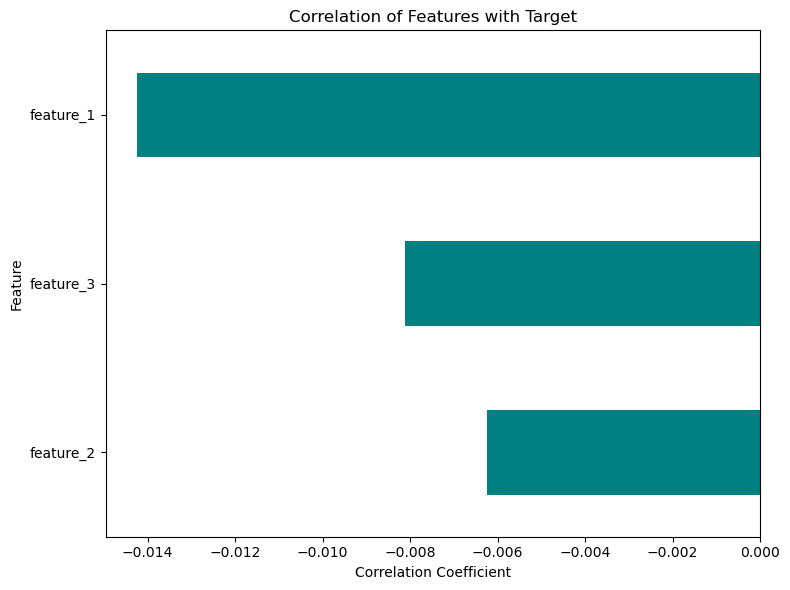

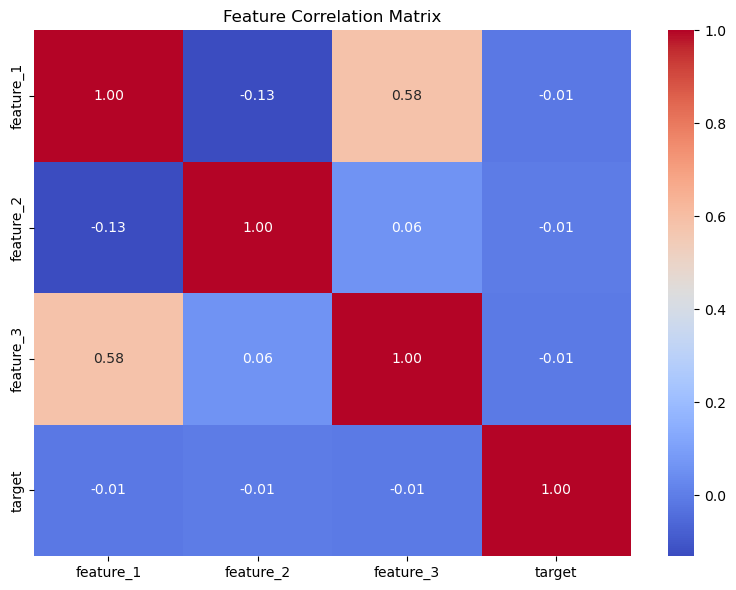


 Target vs. Numerical Features:


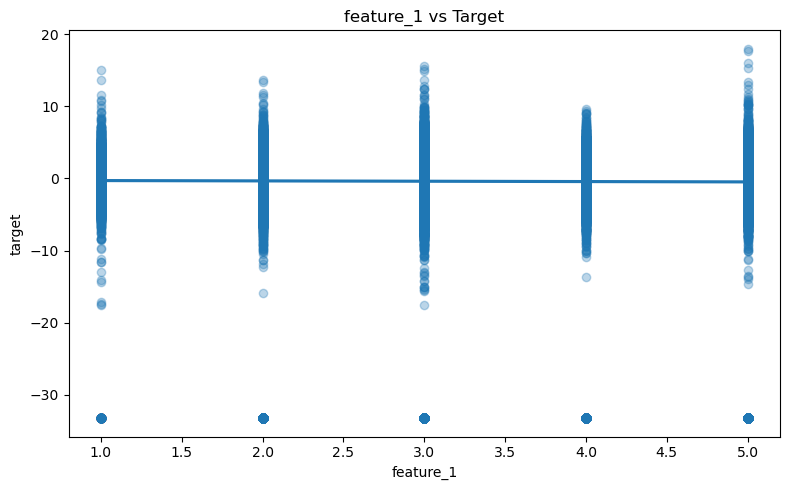

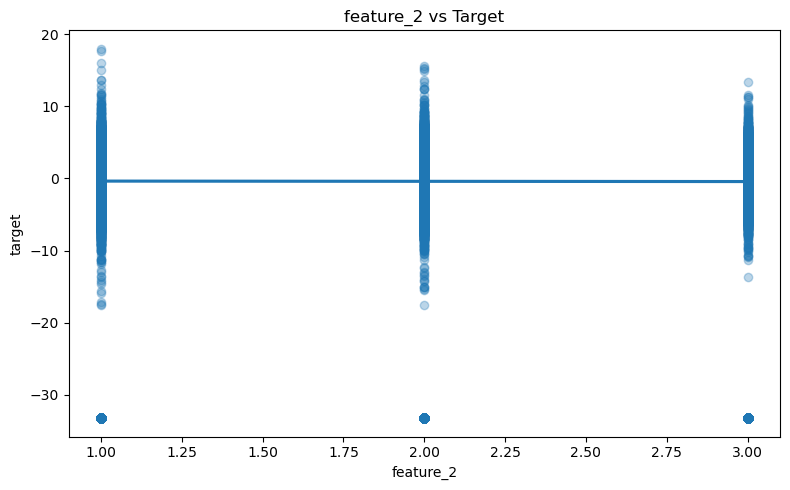

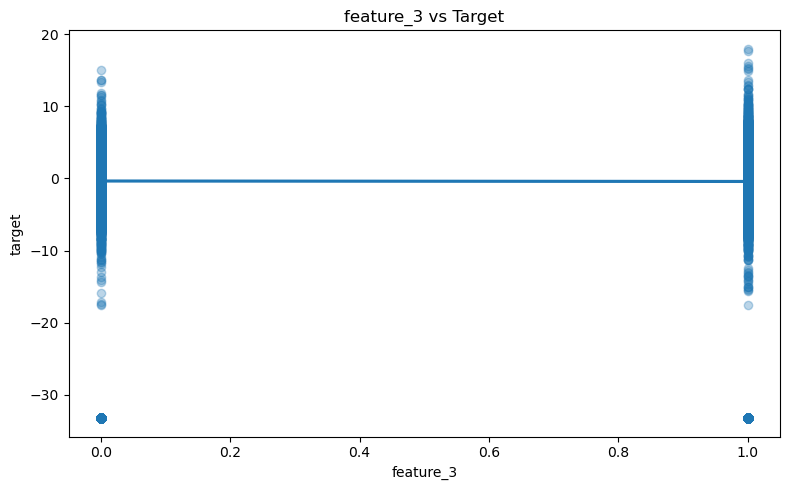


 Mean Target by Categorical Features:


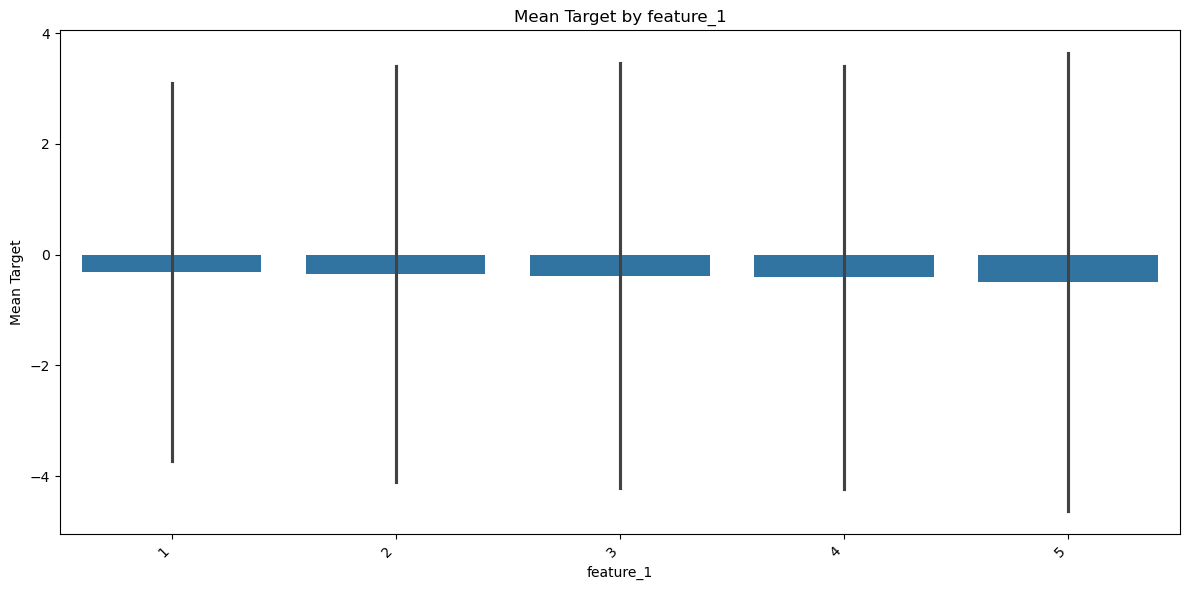

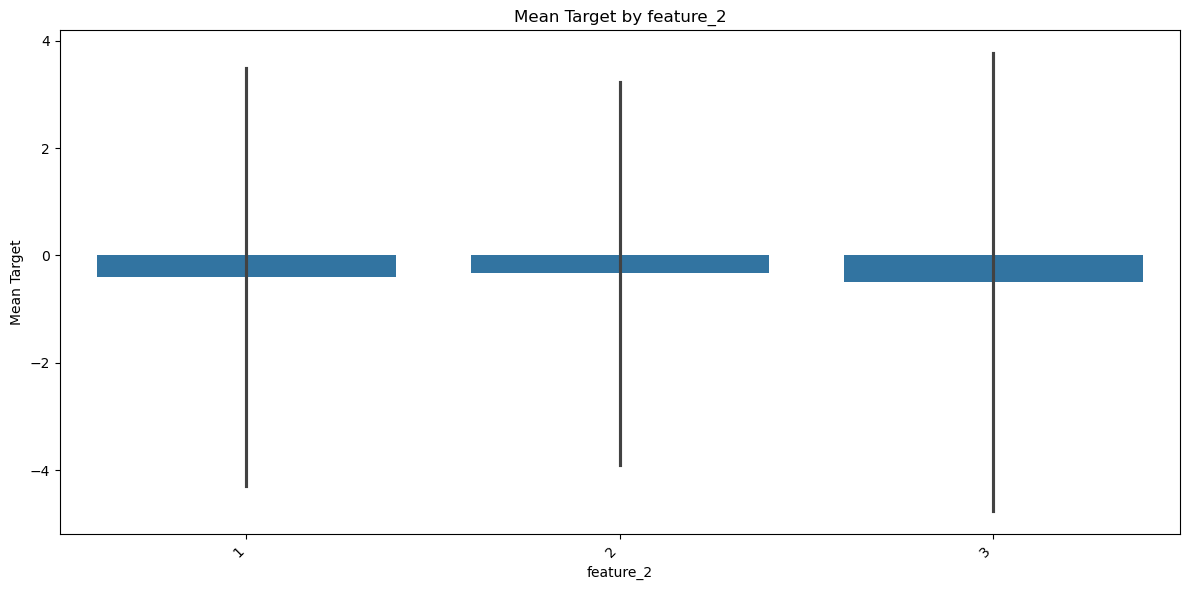

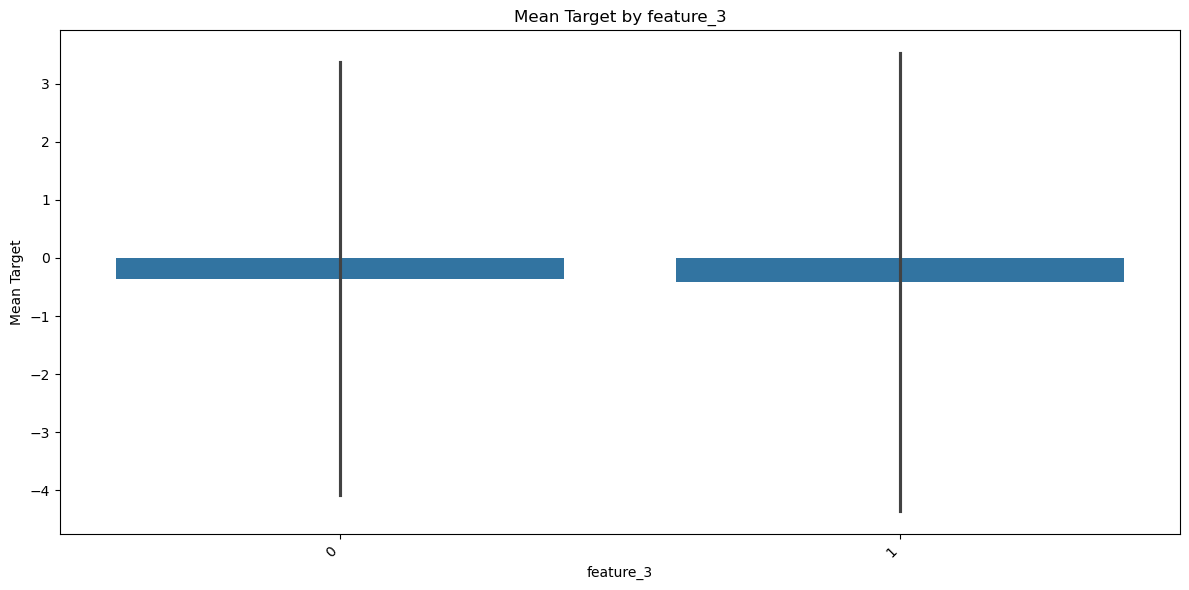

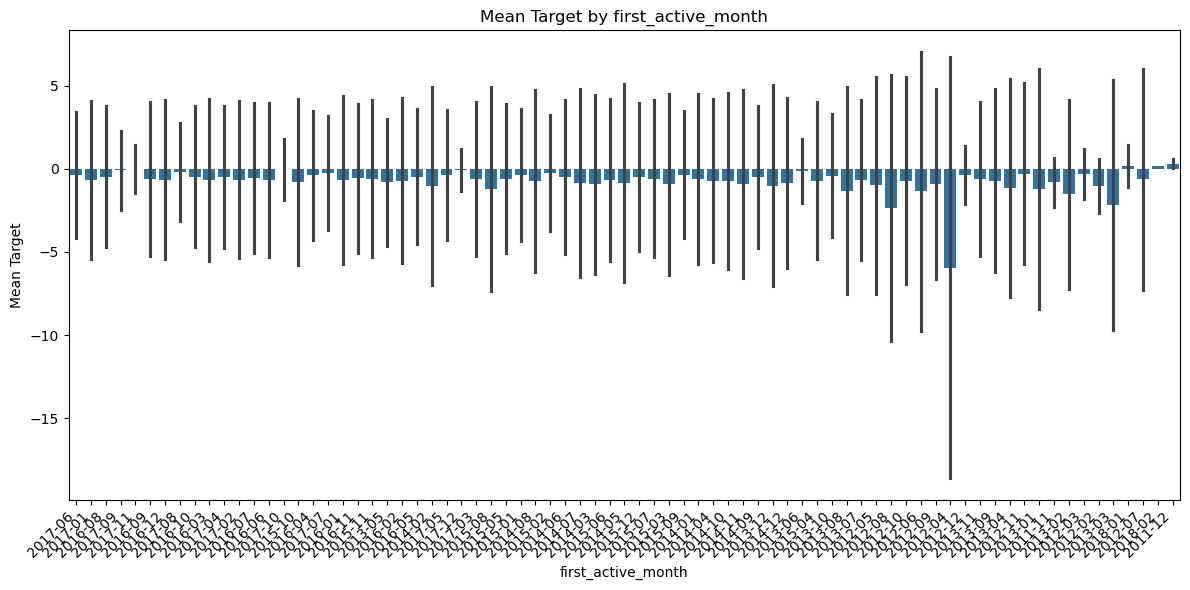

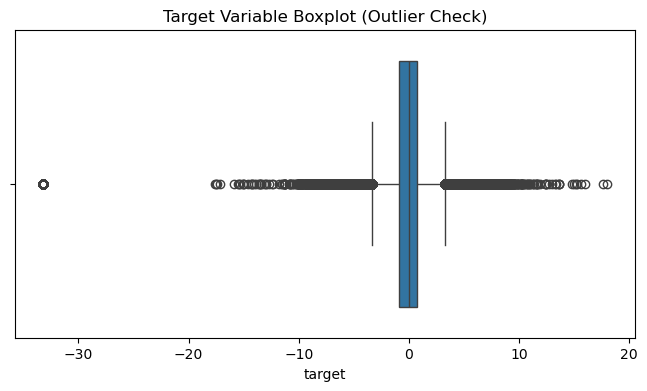

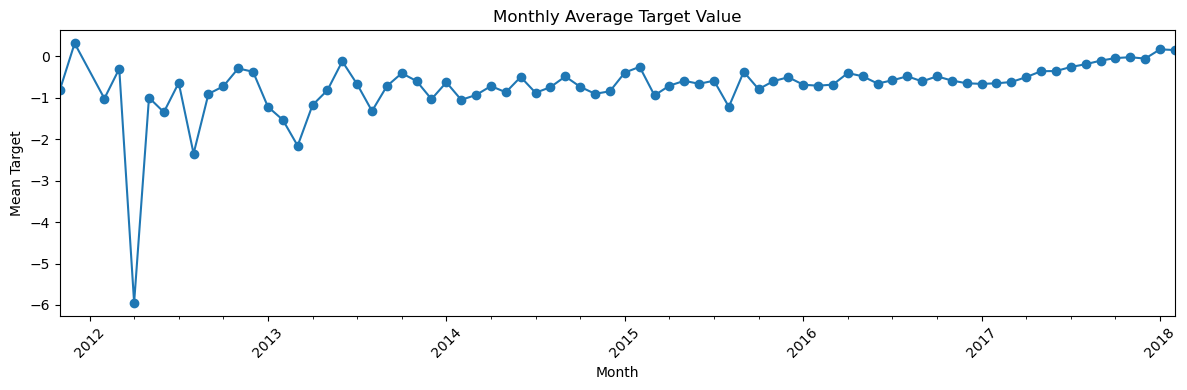

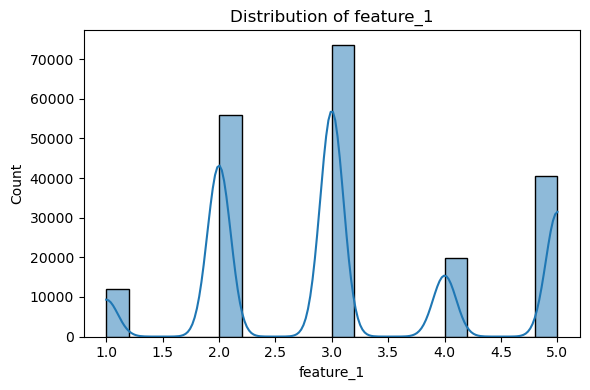

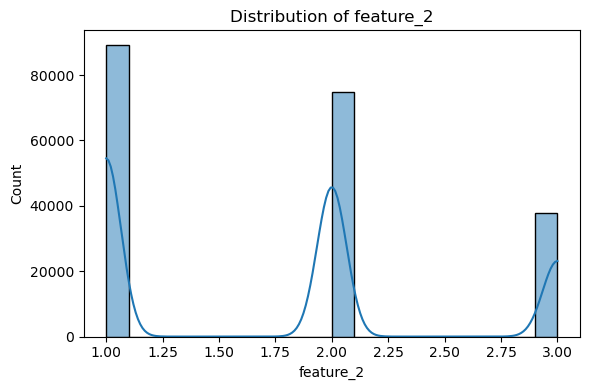

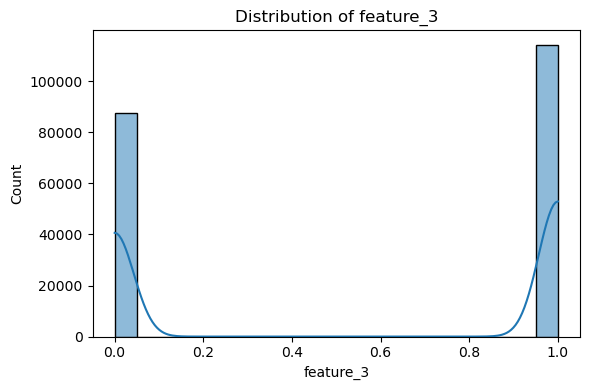

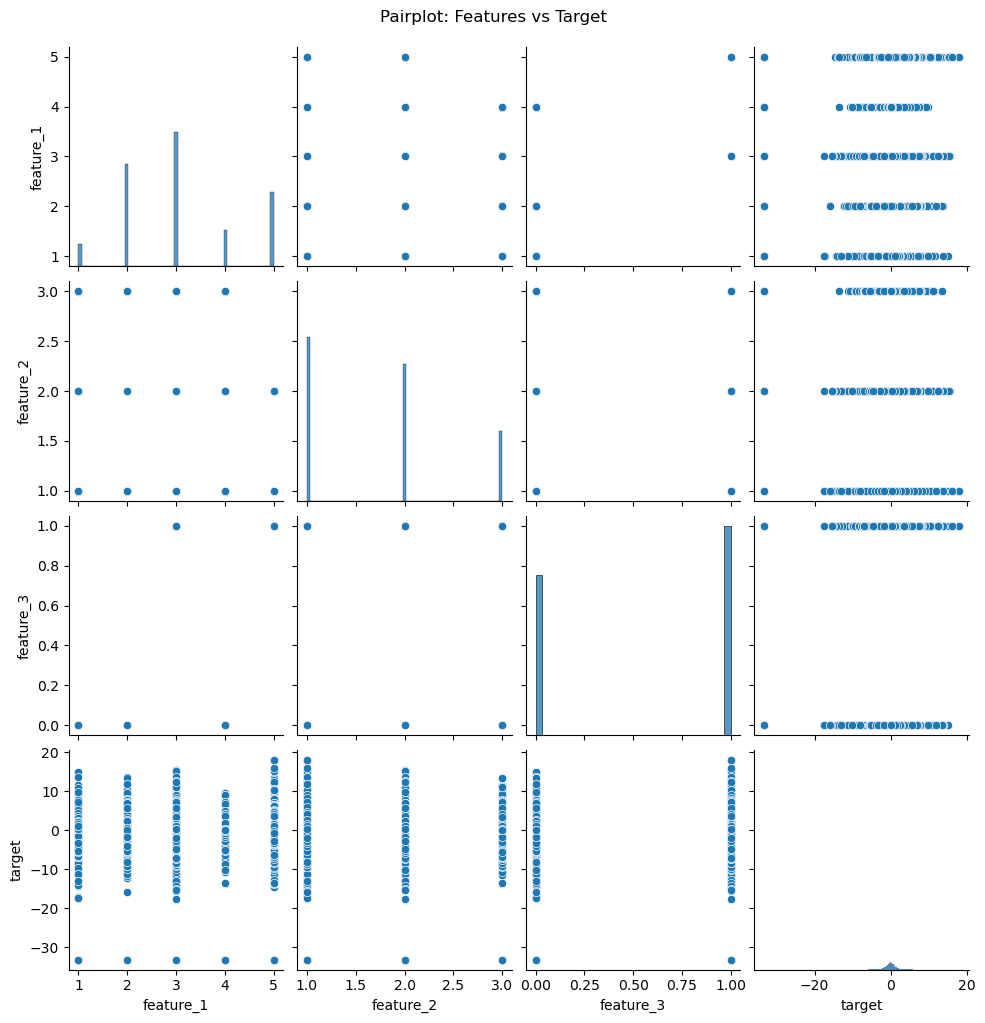

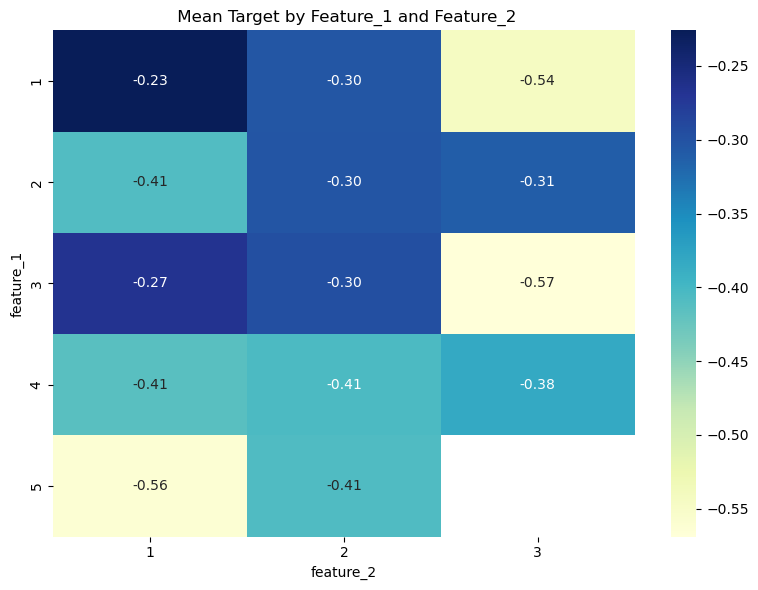


Target Skewness: -6.72
 Target Kurtosis: 55.03


In [4]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data/train.csv")

# Basic Info
print("First 5 Rows:")
print(df.head())
print("\n Data Info:")
df.info()
print("\n Columns List:")
print(df.columns.tolist())

# Target Variable Distribution
plt.figure(figsize = (8, 5))
sns.histplot(df['target'], kde = True, bins = 50)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending = False)
if not missing.empty:
    print("\n Missing Values Detected:")
    print(missing)
else:
    print("\n No Missing Values in the Dataset.")


# Summary statistics for 'target'
print("\n Target Summary Stats:")
print(df['target'].describe().to_string())

# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()

# Correlation with target
if 'target' in corr_matrix.columns:
    target_corr = corr_matrix['target'].sort_values(ascending = False)
    print("\n Correlation with 'target':")
    print(target_corr.to_string())

    # Horizontal bar plot (excluding target itself)
    plt.figure(figsize = (8, 6))
    target_corr.drop('target', errors='ignore').plot(kind='barh', color='teal')
    plt.title("Correlation of Features with Target")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("'target' not found in correlation matrix.")

# Correlation Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Scatter/Regression plots for target vs numerical features
numerical_features = ['feature_1', 'feature_2', 'feature_3']
print("\n Target vs. Numerical Features:")

for col in numerical_features:
    if col in df.columns:
        plt.figure(figsize = (8, 5))
        sns.regplot(data = df, x=col, y = 'target', scatter_kws = {'alpha': 0.3})
        plt.title(f'{col} vs Target')
        plt.tight_layout()
        plt.show()

# Mean Target Value by Categorical Feature
categorical_features = ['feature_1', 'feature_2', 'feature_3', 'first_active_month']
print("\n Mean Target by Categorical Features:")

for col in categorical_features:
    if col in df.columns:
        plt.figure(figsize = (12, 6))
        sns.barplot(data = df, x = col, y = 'target', errorbar = 'sd')
        plt.title(f'Mean Target by {col}')
        plt.xlabel(col)
        plt.ylabel('Mean Target')
        plt.xticks(rotation = 45, ha = 'right')
        plt.tight_layout()
        plt.show()

# Boxplot for target
plt.figure(figsize = (8, 4))
sns.boxplot(x = df['target'])
plt.title("Target Variable Boxplot (Outlier Check)")
plt.show()

df['first_active_month'] = pd.to_datetime(df['first_active_month'])

# Mean target per month
monthly_target = df.groupby(df['first_active_month'].dt.to_period("M"))['target'].mean()

plt.figure(figsize = (12, 4))
monthly_target.plot(kind='line', marker = 'o')
plt.title("Monthly Average Target Value")
plt.xlabel("Month")
plt.ylabel("Mean Target")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

features = ['feature_1', 'feature_2', 'feature_3']
for feature in features:
    plt.figure(figsize = (6, 4))
    sns.histplot(df[feature], kde = True, bins = 20)
    plt.title(f"Distribution of {feature}")
    plt.tight_layout()
    plt.show()

sns.pairplot(df[['feature_1', 'feature_2', 'feature_3', 'target']])
plt.suptitle("Pairplot: Features vs Target", y = 1.02)
plt.show()

plt.figure(figsize = (8, 6))
sns.heatmap(df.pivot_table(index='feature_1', columns='feature_2', values='target', aggfunc='mean'), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title(" Mean Target by Feature_1 and Feature_2")
plt.tight_layout()
plt.show()


from scipy.stats import skew, kurtosis

print(f"\nTarget Skewness: {df['target'].skew():.2f}")
print(f" Target Kurtosis: {df['target'].kurtosis():.2f}")

